# Support Vector Machines

In this section of the assignment, you will get to implement Support Vector Machines which are among the best (and many believe are indeed the best) “off-the-shelf” supervised learning algorithm.

This section is further divided into 3 subsections.


*   In the first subsection, you will work on a synthetic dataset and visualize the boundary predicted by SVM. You will also vary the value of C-parameter and see how the decision boundary changes. **Please note that you cannot use inbuilt sklearn function for SVM in this sub-section**. You can only use a QCQP (Quadratically Constrained Quadratic Program) solver like CVXPY. 

  References which you may find helpful for this subsection: 
  
  1.   https://www.cvxpy.org/
  2.   https://www.cvxpy.org/examples/basic/quadratic_program.html

  Note that in this section you are expected to show how you derived the Quadratically Constrained form(which can be passed into the solver) from the basic principles of SVM algorithm
*  In the next subsection you will use be using the famous MNIST dataset to explore various kernels and report the results. **Please note you may use inbuilt sklearn SVM functions in this subsection**


In [35]:
!pip install numpy
!pip install matplotlib
!pip install cvxpy
import numpy as np
import cvxpy as cp
import matplotlib.pyplot as plt
from cvxopt import matrix as cvxopt_matrix
from cvxopt import solvers as cvxopt_solvers

### Subsection 1

In [36]:
# Feel free to use this helper function to visualize 2D points X with labels +1 or -1
def plot_points(X, Y):
    reds = []
    blues = []
    for i in range(Y.shape[0]):
        if Y[i] == 1:
            reds.append(X[i])
        else:
            blues.append(X[i])
    reds = np.array(reds)
    blues = np.array(blues)
    plt.scatter(reds[:, 0], reds[:, 1], c = 'r')
    plt.scatter(blues[:, 0], blues[:, 1], c = 'b')

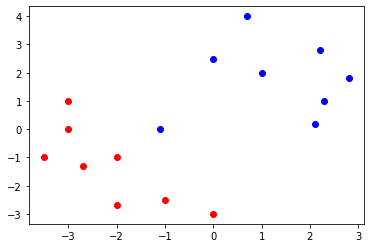

In [37]:
# Create Synthetic Data and visualize the points
X = np.array([[-3.5, -1], [-3, 0], [-3, 1], [-2.7, -1.3], [-2, -1], [-2, -2.7], 
              [-1, -2.5], [0, -3], [-1.1, 0], [0, 2.5], [1, 2], [0.7, 4], 
              [2.1, 0.2], [2.3, 1], [2.8, 1.8], [2.2, 2.8]])
y = np.array([1, 1, 1, 1, 1, 1, 1, 1, -1, -1, -1, -1, -1, -1, -1, -1])

plot_points(X, y)
plt.show()

In the next cell you are required to derive the Quadratic Constrained Quadratic form of SVM **without soft constraints** from the basic principles. Start with the idea that SVM tries to maximize the margin and then derive the form which you can feed to the solver.

Please print the values of w, b. 

**Note: You are also required to upload a page of the derivation. You may also type it in markdown here.**

**Note: You cannot use sklearn SVM functions here.**

In [38]:
# Write your code here
def get_hard_boundary(X,y):
    # rows, cols = X.shape
    y = y.reshape(-1,1) * 1.
    Xprime = y * X
    H = np.dot(Xprime, Xprime.T) * 1.
    m = X.shape[0]

    # CVXOPT solver
    P = cvxopt_matrix(H)
    q = cvxopt_matrix(-np.ones((m, 1)))
    G = cvxopt_matrix(-np.eye(m))
    h = cvxopt_matrix(np.zeros(m))
    A = cvxopt_matrix(y.reshape(1, -1))
    b = cvxopt_matrix(0.0)

    # Run cvxopt solver
    sol = cvxopt_solvers.qp(P, q, G, h, A, b)
    alphas = np.array(sol['x'])
    print(alphas)
    w = np.dot((y * alphas).T, X)[0]
    S = (alphas > 1e-4).flatten()
    b = np.mean(y[S] - np.dot(X[S], w.reshape(-1,1)))
    w  = w.flatten()
    print('w = {}'.format(w))
    print('b = {}'.format(b))
    return w,b
w, b = get_hard_boundary(X,y)

     pcost       dcost       gap    pres   dres
 0: -2.6318e+00 -6.0942e+00  5e+01  5e+00  2e+00
 1: -1.2039e+01 -1.0290e+01  1e+01  2e+00  8e-01
 2: -7.2285e+00 -4.5093e+00  8e+00  8e-01  3e-01
 3: -1.9824e+00 -2.6244e+00  8e-01  1e-02  4e-03
 4: -2.3553e+00 -2.3656e+00  1e-02  2e-04  7e-05
 5: -2.3629e+00 -2.3630e+00  1e-04  2e-06  7e-07
 6: -2.3629e+00 -2.3629e+00  1e-06  2e-08  7e-09
Optimal solution found.
[[ 1.50361550e-08]
 [-1.91861211e-09]
 [ 1.44612457e+00]
 [ 6.04277553e-09]
 [ 2.86972215e-09]
 [ 5.72350138e-09]
 [ 7.66027993e-09]
 [ 9.16824086e-01]
 [ 2.36294861e+00]
 [-1.27795435e-09]
 [ 2.31927109e-09]
 [ 9.35116342e-09]
 [ 1.77025345e-08]
 [ 1.26286442e-08]
 [ 2.25761842e-08]
 [ 2.00230970e-08]]
w = [-1.73913051 -1.3043479 ]
b = -2.9130436323422617


In the next cell you are required to visualize the boundary predicted by the solver. You may want to revise up on how to plot the a line given w, b. Please plot w vector as well as the margin lines

You may want to create a function to plot the line of separation as you would require this frequently in the subsequent parts of the assignment.

In [39]:
# Write your code here
def plot_line(b, w, c):
    '''
    w.t x + b = 0 translates into w[1]*y + w[0]*x + b = 0
    w: [w[0], w[1]] np.ndarray
    b: bias term
    color: denotes the color of the line (usefull to plot multiple lines of different color if needed)
    '''
    x = np.linspace(-4,4)
    a = -w[0]/w[1]
    y = a*x - b/w[1]
    margin = 1 / np.sqrt(w[0]**2 + w[1]**2)
    dist = np.sqrt(1+a**2)
    y_n = y - dist*margin # line on the negitive side
    y_p = y + dist*margin # line on the positive side
    plt.plot(x,y,c)
    plt.plot(x,y_n,c+'--')
    plt.plot(x,y_p,c+'--')

In the next cell please plot only the support vectors along with the boundary, w vector, and margins. 

**Note: You are not supposed to hard-code the points here.**

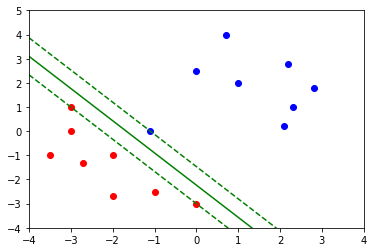

In [40]:
# Write your code here
plot_line(b, w, 'g')
plt.xlim(-4,4)
plt.ylim(-4,5)
plot_points(X,y)

In the next cell add the following points:
* (-4, -10) with label 1
* (4, 4) with label -1

Is the decision boundary changed after adding the points? Explain your observations theoretically.

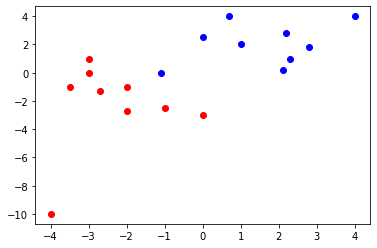

In [41]:
# Re-create the Synthetic Data by adding the points and visualize the points
Xpr = np.array([[-3.5, -1], [-3, 0], [-3, 1], [-2.7, -1.3], [-2, -1], [-2, -2.7], 
              [-1, -2.5], [0, -3], [-1.1, 0], [0, 2.5], [1, 2], [0.7, 4], 
              [2.1, 0.2], [2.3, 1], [2.8, 1.8], [2.2, 2.8], [-4,-10],[4,4]])
ypr = np.array([1, 1, 1, 1, 1, 1, 1, 1, -1, -1, -1, -1, -1, -1, -1, -1,1,-1])

plot_points(Xpr, ypr)
plt.show()

     pcost       dcost       gap    pres   dres
 0: -5.1118e+00 -1.1301e+01  7e+01  8e+00  2e+00
 1: -1.3664e+01 -1.4490e+01  3e+01  4e+00  1e+00
 2: -2.0689e+01 -1.2752e+01  2e+01  2e+00  5e-01
 3: -4.3773e+00 -3.2950e+00  9e+00  4e-01  1e-01
 4: -2.1753e+00 -2.4873e+00  3e-01  5e-16  4e-15
 5: -2.3607e+00 -2.3642e+00  3e-03  5e-16  3e-15
 6: -2.3629e+00 -2.3630e+00  3e-05  5e-16  5e-15
 7: -2.3629e+00 -2.3629e+00  3e-07  9e-16  2e-15
Optimal solution found.
[[1.93585250e-10]
 [2.23058289e-09]
 [1.44612473e+00]
 [1.76439565e-09]
 [1.77513823e-09]
 [2.28433200e-09]
 [6.57329014e-09]
 [9.16824163e-01]
 [2.36294889e+00]
 [3.21249894e-09]
 [2.67320812e-09]
 [4.71322242e-10]
 [3.13846867e-09]
 [2.66506341e-09]
 [2.33017169e-09]
 [2.03734866e-09]
 [2.90032240e-09]
 [2.59282838e-09]]
w = [-1.73913048 -1.30434785]
b = -2.9130435652415354


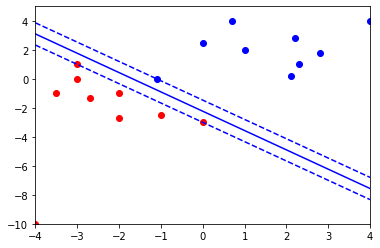

In [42]:
# Solve for the decision boundary using this modified dataset
wpr, bpr = get_hard_boundary(Xpr,ypr)
plot_line(bpr,wpr,'b')
plt.xlim(-4,4)
plt.ylim(-10,5)
plot_points(Xpr,ypr)

In the next cell you are required to modify your framing of optimisation problem to incorporate soft constraints also known as slack. Plot the decision boundary, w and margin lines for various values of C: $0.01$, $0.1$, $3$, $10$, $100$.

Explain your results theoretically. How does the boundary change with varying values of C? Why?

**Note: Use the modified X and y i.e after adding points in previous cell.**

In [43]:
# Write your code here for C= 0.01
def get_soft_boundary(X, y, C):
    '''
    
    '''
    # Initializing values and computing H. Note the 1. to force to float type
    y = y.reshape(-1,1) * 1.
    Xprime = y * X
    H = np.dot(Xprime, Xprime.T) * 1.
    m = X.shape[0]

    # Converting into cvxopt format - as previously
    P = cvxopt_matrix(H)
    q = cvxopt_matrix(-np.ones((m, 1)))
    G = cvxopt_matrix(np.vstack((np.eye(m)*-1,np.eye(m))))
    h = cvxopt_matrix(np.hstack((np.zeros(m), np.ones(m) * C)))
    A = cvxopt_matrix(y.reshape(1, -1))
    b = cvxopt_matrix(0.0)

    # Run solver
    sol = cvxopt_solvers.qp(P, q, G, h, A, b)
    alphas = np.array(sol['x'])
    print(alphas)
    w = np.dot((y * alphas).T, X)[0]
    S = (alphas > 1e-4).flatten()
    b = np.mean(y[S] - np.dot(X[S], w.reshape(-1,1)))
    w  = w.flatten()
    print('w = {}'.format(w))
    print('b = {}'.format(b))
    return w,b  

     pcost       dcost       gap    pres   dres
 0: -2.6026e+00 -3.5361e-01  9e+01  1e+01  4e-15
 1: -1.2076e-01 -3.5017e-01  2e+00  1e-01  3e-15
 2: -7.6571e-02 -2.5938e-01  2e-01  2e-17  4e-16
 3: -8.5515e-02 -1.0718e-01  2e-02  7e-18  3e-16
 4: -9.3127e-02 -9.6086e-02  3e-03  1e-17  2e-16
 5: -9.4765e-02 -9.5225e-02  5e-04  2e-17  1e-16
 6: -9.4945e-02 -9.4962e-02  2e-05  9e-18  2e-16
 7: -9.4953e-02 -9.4953e-02  2e-07  8e-18  2e-16
 8: -9.4953e-02 -9.4953e-02  2e-09  1e-17  2e-16
Optimal solution found.
[[6.71204771e-03]
 [9.99999984e-03]
 [9.99999991e-03]
 [9.99999963e-03]
 [9.99999986e-03]
 [3.28794192e-03]
 [9.99999983e-03]
 [9.99999988e-03]
 [9.99999996e-03]
 [9.99999988e-03]
 [9.99999984e-03]
 [9.99999788e-03]
 [9.99999988e-03]
 [9.99999977e-03]
 [9.99998985e-03]
 [1.48050695e-09]
 [2.39690397e-11]
 [5.98783389e-11]]
w = [-0.22506802 -0.19858947]
b = -0.061136662301054766


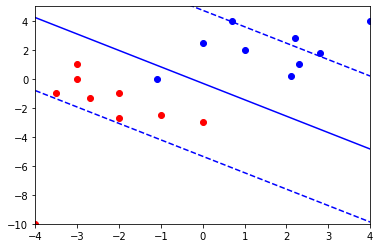

In [48]:
cvals = [0.01,0.1,3,10,100]
w, b = get_soft_boundary(Xpr,ypr,cvals[0])
plot_line(b, w, 'b')
plt.xlim(-4,4)
plt.ylim(-10,5)
plot_points(Xpr,ypr)

     pcost       dcost       gap    pres   dres
 0: -2.8305e+00 -3.1272e+00  9e+01  9e+00  2e-15
 1: -5.6185e-01 -2.8854e+00  7e+00  5e-01  2e-15
 2: -1.8369e-01 -1.4329e+00  1e+00  3e-02  3e-15
 3: -2.4621e-01 -4.0857e-01  2e-01  3e-03  3e-16
 4: -2.9106e-01 -3.3155e-01  4e-02  6e-04  2e-16
 5: -3.0175e-01 -3.0939e-01  8e-03  1e-04  3e-16
 6: -3.0399e-01 -3.0541e-01  1e-03  2e-05  2e-16
 7: -3.0455e-01 -3.0457e-01  2e-05  2e-07  4e-16
 8: -3.0455e-01 -3.0456e-01  2e-07  2e-09  4e-16
Optimal solution found.
[[8.79551245e-09]
 [2.55942814e-07]
 [9.99999918e-02]
 [1.54947073e-08]
 [2.02031778e-02]
 [6.15191681e-09]
 [4.16730960e-08]
 [9.99998861e-02]
 [9.99999954e-02]
 [4.66177139e-02]
 [2.83238875e-08]
 [3.25046301e-09]
 [7.35856199e-02]
 [1.62029475e-08]
 [4.85810915e-09]
 [3.08356649e-09]
 [2.90361311e-09]
 [1.87129242e-09]]
w = [-0.38493714 -0.35146454]
b = -0.27419798684052854


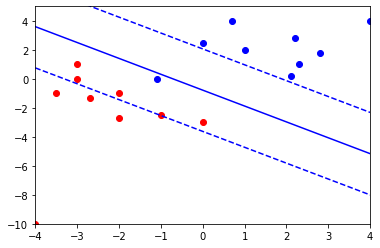

In [49]:
# Write your code here for C= 0.1
w, b = get_soft_boundary(Xpr,ypr,cvals[1])
plot_line(b, w, 'b')
plt.xlim(-4,4)
plt.ylim(-10,5)
plot_points(Xpr,ypr)

     pcost       dcost       gap    pres   dres
 0: -9.8203e+00 -1.7049e+02  5e+02  1e+00  6e-15
 1: -4.0656e+00 -6.5544e+01  9e+01  1e-01  1e-14
 2: -2.5363e+00 -1.5179e+01  2e+01  2e-02  7e-15
 3: -1.9374e+00 -4.1091e+00  3e+00  3e-03  6e-15
 4: -2.3455e+00 -2.4598e+00  1e-01  1e-04  3e-15
 5: -2.3628e+00 -2.3639e+00  1e-03  1e-06  2e-15
 6: -2.3629e+00 -2.3630e+00  1e-05  1e-08  3e-15
 7: -2.3629e+00 -2.3629e+00  1e-07  1e-10  3e-15
Optimal solution found.
[[ 4.97914982e-10]
 [ 1.53541951e-09]
 [ 1.44612475e+00]
 [ 8.74808129e-10]
 [ 1.61164225e-09]
 [ 5.80241715e-10]
 [ 2.20661009e-09]
 [ 9.16824189e-01]
 [ 2.36294895e+00]
 [ 1.63139880e-10]
 [ 2.79525272e-10]
 [ 4.53230056e-11]
 [ 3.49621647e-10]
 [ 2.17819599e-10]
 [ 6.91292606e-11]
 [ 1.57863728e-11]
 [-4.08037057e-11]
 [-6.18637669e-11]]
w = [-1.73913043 -1.30434782]
b = -2.9130434744072304


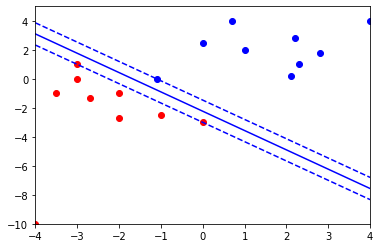

In [50]:
# Write your code here for C= 3
w, b = get_soft_boundary(Xpr,ypr,cvals[2])
plot_line(b, w, 'b')
plt.xlim(-4,4)
plt.ylim(-10,5)
plot_points(Xpr,ypr)

     pcost       dcost       gap    pres   dres
 0: -2.3870e+01 -1.2468e+03  3e+03  7e-01  3e-14
 1: -2.1107e+00 -4.3739e+02  7e+02  1e-01  1e-14
 2:  1.8660e+00 -7.1407e+01  1e+02  2e-02  1e-14
 3:  2.2865e+00 -1.4223e+01  2e+01  1e-15  1e-14
 4: -1.1166e+00 -3.1550e+00  2e+00  5e-16  5e-15
 5: -2.2967e+00 -2.5360e+00  2e-01  2e-16  2e-15
 6: -2.3623e+00 -2.3647e+00  2e-03  2e-16  3e-15
 7: -2.3629e+00 -2.3630e+00  2e-05  2e-16  2e-15
 8: -2.3629e+00 -2.3629e+00  2e-07  2e-16  2e-15
Optimal solution found.
[[1.37880248e-09]
 [2.27053652e-09]
 [1.44612475e+00]
 [1.76399112e-09]
 [1.62934674e-09]
 [1.54137593e-09]
 [2.15511132e-09]
 [9.16824188e-01]
 [2.36294895e+00]
 [1.02937969e-09]
 [8.54637679e-10]
 [6.44518880e-10]
 [9.19096907e-10]
 [7.46034446e-10]
 [5.92637091e-10]
 [5.75410610e-10]
 [3.35489937e-10]
 [3.88057028e-10]]
w = [-1.73913045 -1.30434784]
b = -2.9130435144776587


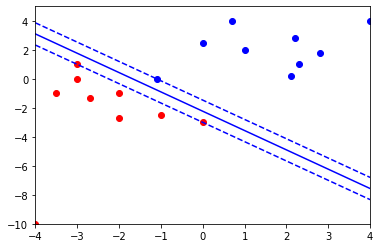

In [51]:
# Write your code here for C= 10
w, b = get_soft_boundary(Xpr,ypr,cvals[3])
plot_line(b, w, 'b')
plt.xlim(-4,4)
plt.ylim(-10,5)
plot_points(Xpr,ypr)

     pcost       dcost       gap    pres   dres
 0:  1.5101e+02 -9.9716e+04  2e+05  6e-01  3e-13
 1:  9.3916e+02 -3.3387e+04  5e+04  1e-01  1e-12
 2:  9.9369e+02 -6.8221e+03  1e+04  2e-02  3e-13
 3:  4.2180e+02 -8.9811e+02  1e+03  7e-15  9e-14
 4:  6.0363e+01 -8.4259e+01  1e+02  2e-15  3e-14
 5:  6.6556e+00 -1.3117e+01  2e+01  1e-15  8e-15
 6: -5.5520e-01 -2.9306e+00  2e+00  6e-16  3e-15
 7: -2.2449e+00 -2.5867e+00  3e-01  4e-16  2e-15
 8: -2.3616e+00 -2.3653e+00  4e-03  2e-16  3e-15
 9: -2.3629e+00 -2.3630e+00  4e-05  4e-16  3e-15
10: -2.3629e+00 -2.3629e+00  4e-07  1e-16  2e-15
Optimal solution found.
[[2.69235992e-09]
 [6.53755511e-09]
 [1.44612473e+00]
 [3.42800666e-09]
 [7.20462830e-09]
 [2.59305900e-09]
 [4.44321259e-09]
 [9.16824176e-01]
 [2.36294892e+00]
 [1.94395091e-09]
 [1.59543478e-09]
 [1.03690132e-09]
 [1.83020198e-09]
 [1.40937640e-09]
 [1.07971501e-09]
 [1.01749630e-09]
 [6.59982820e-10]
 [7.74461749e-10]]
w = [-1.73913046 -1.30434786]
b = -2.913043535084911


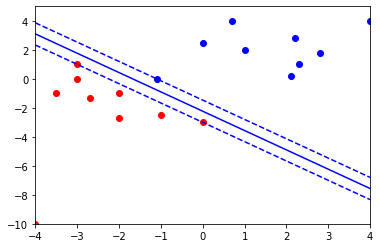

In [52]:
# Write your code here for C= 100
w, b = get_soft_boundary(Xpr,ypr,cvals[4])
plot_line(b, w, 'b')
plt.xlim(-4,4)
plt.ylim(-10,5)
plot_points(Xpr,ypr)

Take the case of C = 100 and remove the support vectors. Does the boundary change after the deletion?
Explain why? Show your results by appropriate plots?

     pcost       dcost       gap    pres   dres
 0:  3.3858e+02 -6.2135e+04  1e+05  4e-01  2e-13
 1:  9.9183e+02 -1.7670e+04  3e+04  7e-02  4e-13
 2:  6.4800e+02 -9.3731e+02  2e+03  1e-03  6e-14
 3:  1.0072e+02 -1.1431e+02  2e+02  1e-15  3e-14
 4:  1.3779e+01 -1.7386e+01  3e+01  2e-16  9e-15
 5:  1.6923e+00 -2.7486e+00  4e+00  1e-16  6e-15
 6:  1.0077e-01 -5.1638e-01  6e-01  2e-16  2e-15
 7: -8.7537e-02 -1.5420e-01  7e-02  1e-16  6e-16
 8: -1.2589e-01 -1.4431e-01  2e-02  2e-16  2e-16
 9: -1.3487e-01 -1.3645e-01  2e-03  2e-16  4e-16
10: -1.3584e-01 -1.3586e-01  2e-05  2e-16  3e-16
11: -1.3585e-01 -1.3585e-01  2e-07  2e-16  6e-16
12: -1.3585e-01 -1.3585e-01  2e-09  2e-16  4e-16
Optimal solution found.
[[1.49517507e-10]
 [7.26175399e-09]
 [2.03526757e-10]
 [1.35851955e-01]
 [9.03038986e-11]
 [7.70554977e-11]
 [8.19313414e-02]
 [3.83597237e-10]
 [5.11031345e-11]
 [5.39206206e-02]
 [2.76593613e-10]
 [1.09976942e-10]
 [8.65752958e-11]
 [3.80338423e-11]
 [5.72579993e-11]]
w = [-0.38493724 -0.

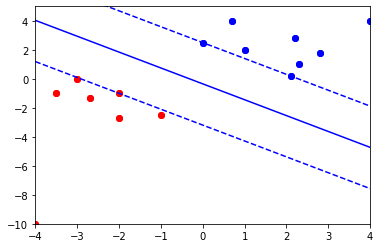

In [53]:
# Write your Code here
Xpr = np.array([[-3.5, -1], [-3, 0],  [-2.7, -1.3], [-2, -1], [-2, -2.7], 
              [-1, -2.5],   [0, 2.5], [1, 2], [0.7, 4], 
              [2.1, 0.2], [2.3, 1], [2.8, 1.8], [2.2, 2.8], [-4,-10],[4,4]])
ypr = np.array([1, 1,  1, 1, 1, 1,  -1, -1, -1, -1, -1, -1, -1,1,-1])
plot_points(Xpr, ypr)
w, b = get_soft_boundary(Xpr,ypr, cvals[4])
plot_line(b, w,'b')
plt.xlim(-4,4)
plt.ylim(-10,5)
plot_points(Xpr,ypr)

### Subsection 2

In [54]:
!pip install python-mnist
!rm -rf samples
!mkdir samples
!wget http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz -P samples/
!gunzip samples/train-images-idx3-ubyte.gz
!wget http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz -P samples/
!gunzip samples/train-labels-idx1-ubyte.gz
!wget http://yann.lecun.com/exdb/mnist/t10k-images-idx3-ubyte.gz -P samples/
!gunzip samples/t10k-images-idx3-ubyte.gz
!wget http://yann.lecun.com/exdb/mnist/t10k-labels-idx1-ubyte.gz -P samples/
!gunzip samples/t10k-labels-idx1-ubyte.gz

--2021-12-04 22:55:14--  http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz
Resolving yann.lecun.com (yann.lecun.com)... 172.67.171.76, 104.21.29.36, 2606:4700:3036::ac43:ab4c, ...
Connecting to yann.lecun.com (yann.lecun.com)|172.67.171.76|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9912422 (9.5M) [application/x-gzip]
Saving to: ‘samples/train-images-idx3-ubyte.gz’

train-images-idx3-u 100%[===================>]   9.45M  1.94MB/s    in 4.7s    

2021-12-04 22:55:20 (2.00 MB/s) - ‘samples/train-images-idx3-ubyte.gz’ saved [9912422/9912422]

--2021-12-04 22:55:20--  http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz
Resolving yann.lecun.com (yann.lecun.com)... 104.21.29.36, 172.67.171.76, 2606:4700:3034::6815:1d24, ...
Connecting to yann.lecun.com (yann.lecun.com)|104.21.29.36|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 28881 (28K) [application/x-gzip]
Saving to: ‘samples/train-labels-idx1-ubyte.gz’

train-label

In [55]:
# Import Relevant Packages
from sklearn.svm import SVC
import numpy as np
from mnist.loader import MNIST

In [58]:
mndata = MNIST('samples')

# Load training dataset
images, labels = mndata.load_training()
l = len(labels)
images_train = np.array(images)[:900, :]
labels_train = np.array(labels)[:900]

print(images_train.shape)
print(labels_train.shape)

(900, 784)
(900,)


In [59]:
# Load testing dataset
images, labels = mndata.load_testing()
l = len(labels)
images_test = np.array(images)[:300, :]
labels_test = np.array(labels)[:300]

print(images_test.shape)
print(labels_test.shape)

(300, 784)
(300,)


- Tweak different parameters like the C Parameter and gamma parameter of the Linear SVM and report the results.
- Experiment different kernels for classification and report the results.

Report accuracy score, F1-score, Confusion matrix and any other metrics you feel useful.

In [73]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.svm import SVC 
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, f1_score
from sklearn.preprocessing import StandardScaler

def SVM(kernel, gamma='scale', C=1.0):
    '''
    kernel: SVC standard sklearn kernels
    gamma: SVC standard sklearn gamma options
    '''
    print("Kernel:  {}  Gamma: {}  C: {}".format(kernel, gamma, C))
    svc = SVC(kernel=kernel, gamma = gamma, C=C)
    svc.fit(images_train,labels_train)
    y_pred = svc.predict(images_test)
    accuracy = accuracy_score(labels_test, y_pred)
    print("Accuracy: {}".format(accuracy))
    mat = confusion_matrix(labels_test, y_pred)
    print('Confusion matrix: \n{}'.format(mat))
    print('-----------------------------------------------------------------------------')
    return accuracy


In [74]:
# Testing various kernels
kernels = ["linear", "poly", "rbf", "sigmoid"]
max_accuracy = 0
best_kernel = None
for kernel in kernels:
    acc = SVM(kernel)
    if acc > max_accuracy:
        max_accuracy = acc
        best_kernel = kernel
print('Best kernel: {} Best accuracy: {}'.format(best_kernel, max_accuracy))

Kernel:  linear  Gamma: scale  C: 1.0
Accuracy: 0.8866666666666667
Confusion matrix: 
[[24  0  0  0  0  0  0  0  0  0]
 [ 0 41  0  0  0  0  0  0  0  0]
 [ 0  0 31  0  1  0  0  0  0  0]
 [ 0  0  0 20  0  4  0  0  0  0]
 [ 0  0  0  0 33  0  1  0  0  3]
 [ 0  1  1  0  0 24  0  3  0  0]
 [ 0  0  2  0  0  1 21  0  0  0]
 [ 0  0  2  1  2  0  0 28  0  1]
 [ 0  0  0  1  0  2  0  1 16  1]
 [ 0  0  0  3  1  1  0  1  0 28]]
-----------------------------------------------------------------------------
Kernel:  poly  Gamma: scale  C: 1.0
Accuracy: 0.85
Confusion matrix: 
[[22  1  1  0  0  0  0  0  0  0]
 [ 0 41  0  0  0  0  0  0  0  0]
 [ 0  5 25  0  0  1  0  1  0  0]
 [ 0  6  1 13  0  3  0  1  0  0]
 [ 0  0  0  0 36  0  0  0  0  1]
 [ 0  5  1  0  0 22  0  1  0  0]
 [ 0  1  2  0  1  1 19  0  0  0]
 [ 0  1  0  0  2  0  0 31  0  0]
 [ 0  0  0  0  0  1  0  0 19  1]
 [ 0  2  0  0  3  0  0  1  1 27]]
-----------------------------------------------------------------------------
Kernel:  rbf  Gamma: scale

In [75]:
# Tweaking Gamma with rbf kernel (which was found to be the best in the previous tests)
gammas = ["scale","auto", 1e-10, 1e-9, 1e-8, 0.3, 1]
max_accuracy = 0
best_gamma = None
for gamma in gammas:
    SVM("rbf",gamma)
    if acc > max_accuracy:
        max_accuracy = acc
        best_gamma = gamma
print('Best gamma: {} Best accuracy: {}'.format(best_gamma, max_accuracy))


Kernel:  rbf  Gamma: scale  C: 1.0
Accuracy: 0.9033333333333333
Confusion matrix: 
[[24  0  0  0  0  0  0  0  0  0]
 [ 0 41  0  0  0  0  0  0  0  0]
 [ 0  0 30  0  1  0  0  1  0  0]
 [ 0  0  1 18  0  5  0  0  0  0]
 [ 0  0  0  0 35  0  1  0  0  1]
 [ 0  1  1  0  0 25  0  2  0  0]
 [ 1  0  3  0  0  1 19  0  0  0]
 [ 0  0  0  0  2  0  0 31  0  1]
 [ 0  0  1  0  1  1  0  1 17  0]
 [ 0  0  0  0  1  0  0  1  1 31]]
-----------------------------------------------------------------------------
Kernel:  rbf  Gamma: auto  C: 1.0
Accuracy: 0.13666666666666666
Confusion matrix: 
[[ 0 24  0  0  0  0  0  0  0  0]
 [ 0 41  0  0  0  0  0  0  0  0]
 [ 0 32  0  0  0  0  0  0  0  0]
 [ 0 24  0  0  0  0  0  0  0  0]
 [ 0 37  0  0  0  0  0  0  0  0]
 [ 0 29  0  0  0  0  0  0  0  0]
 [ 0 24  0  0  0  0  0  0  0  0]
 [ 0 34  0  0  0  0  0  0  0  0]
 [ 0 21  0  0  0  0  0  0  0  0]
 [ 0 34  0  0  0  0  0  0  0  0]]
-----------------------------------------------------------------------------
Kernel:  rbf  Ga

In [80]:
# Testing various values of C
Cvals = [0.00001, 0.001, 0.1, 1, 5, 10, 100, 10000]
max_accuracy = 0
best_C = None
for cv in Cvals:
    SVM("rbf","scale",cv)
    if acc > max_accuracy:
        max_accuracy = acc
        best_C = cv
print('Best C: {} Best accuracy: {}'.format(best_C, max_accuracy))

Kernel:  rbf  Gamma: scale  C: 1e-05
Accuracy: 0.13666666666666666
Confusion matrix: 
[[ 0 24  0  0  0  0  0  0  0  0]
 [ 0 41  0  0  0  0  0  0  0  0]
 [ 0 32  0  0  0  0  0  0  0  0]
 [ 0 24  0  0  0  0  0  0  0  0]
 [ 0 37  0  0  0  0  0  0  0  0]
 [ 0 29  0  0  0  0  0  0  0  0]
 [ 0 24  0  0  0  0  0  0  0  0]
 [ 0 34  0  0  0  0  0  0  0  0]
 [ 0 21  0  0  0  0  0  0  0  0]
 [ 0 34  0  0  0  0  0  0  0  0]]
-----------------------------------------------------------------------------
Kernel:  rbf  Gamma: scale  C: 0.001
Accuracy: 0.13666666666666666
Confusion matrix: 
[[ 0 24  0  0  0  0  0  0  0  0]
 [ 0 41  0  0  0  0  0  0  0  0]
 [ 0 32  0  0  0  0  0  0  0  0]
 [ 0 24  0  0  0  0  0  0  0  0]
 [ 0 37  0  0  0  0  0  0  0  0]
 [ 0 29  0  0  0  0  0  0  0  0]
 [ 0 24  0  0  0  0  0  0  0  0]
 [ 0 34  0  0  0  0  0  0  0  0]
 [ 0 21  0  0  0  0  0  0  0  0]
 [ 0 34  0  0  0  0  0  0  0  0]]
-----------------------------------------------------------------------------
Kernel:  r

# Observations, analysis and reports
- For fixed gamma and C values, `rbf kernel` was found to produce best accuracy on the test set (90.33%) among all other standard kernels (linear, poly, rbf and sigmoid) in SVMs
- Using rbf kernel and C value as 1.0, I found that best gamma happens to occur in the range - $[9*1e-9, 1e-8]$ and gives the best accuracy when set to 'scale' (84%).
- Using best kernel (rbf) and best gamma (scale), I found that the best accuracy is obtained with $C>=5$ which is 92.33%. This is obvious because with increase in C, SVM overfits train set by creating a thin boundary (as no examples, not even outliers, are avoided while calculating the boundary). Though it worked here, it is not favorable because of its small margin. Generally this will be very vulnerable to outliers. An optimal value of C for this model might lie between [1e-1, 1]. 
